In [1]:
! pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
import pathlib
import glob
import shutil
from zipfile import ZipFile
from IPython.display import FileLink
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

2024-06-03 17:23:00.438898: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 17:23:00.439025: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 17:23:00.593326: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
path="/kaggle/input/fast-food-classification-dataset/Fast Food Classification V2/Train/"

### Data Information

In [4]:
path="/kaggle/input/fast-food-classification-dataset/Fast Food Classification V2/Train/"

class_names = sorted(os.listdir(path))
n_classes = len(class_names)

class_dis = [len(os.listdir(path + f"/{name}")) for name in class_names]
print(f"Class Distribution : \n{class_dis}")

Class Distribution : 
[1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


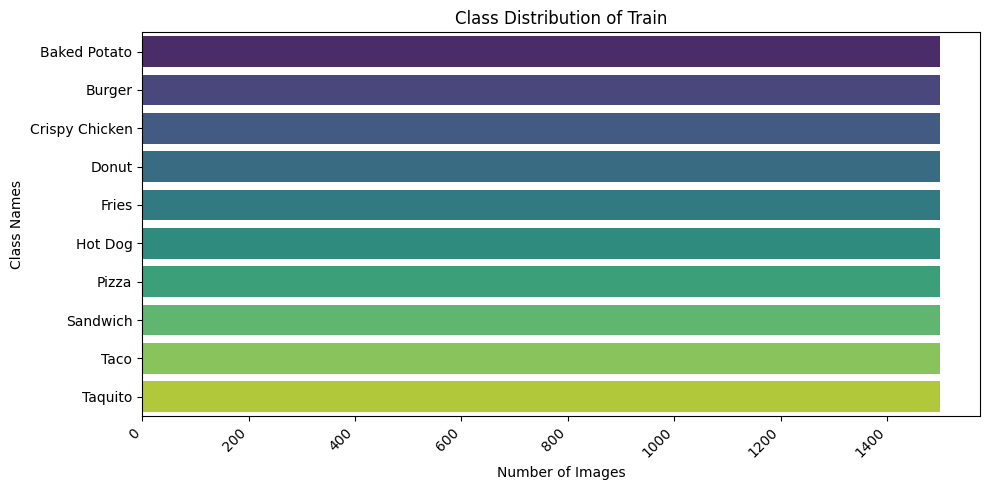

In [5]:
colors = sns.color_palette('viridis', n_classes)
plt.figure(figsize=(10, 5))
sns.barplot(y=class_names, x=class_dis, palette=colors, orient='h')

# Add labels and title
plt.xlabel('Number of Images')
plt.ylabel('Class Names')
plt.title('Class Distribution of Train')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [6]:
path="/kaggle/input/fast-food-classification-dataset/Fast Food Classification V2/Valid/"

class_names = sorted(os.listdir(path))
n_classes = len(class_names)

class_dis = [len(os.listdir(path + f"/{name}")) for name in class_names]
print(f"Class Distribution : \n{class_dis}")

Class Distribution : 
[400, 300, 400, 300, 400, 300, 300, 300, 400, 400]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


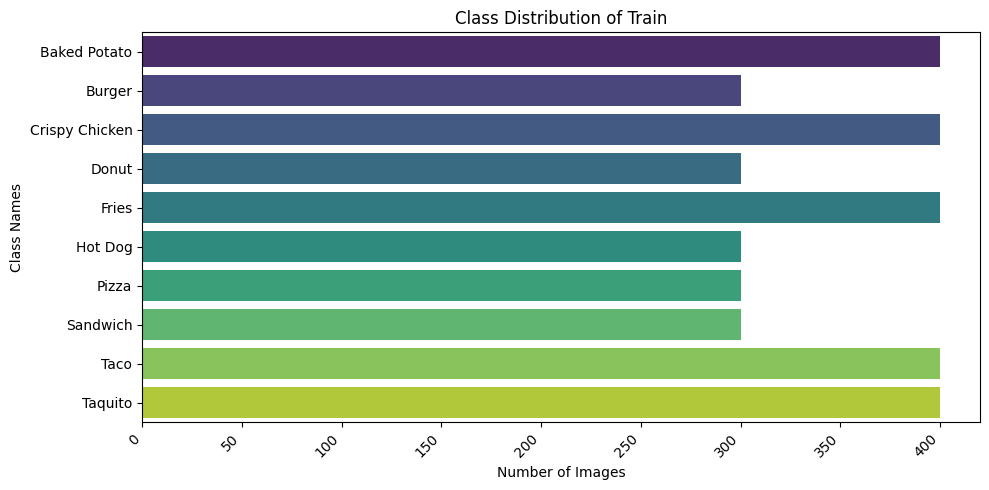

In [7]:
colors = sns.color_palette('viridis', n_classes)
plt.figure(figsize=(10, 5))
sns.barplot(y=class_names, x=class_dis, palette=colors, orient='h')

# Add labels and title
plt.xlabel('Number of Images')
plt.ylabel('Class Names')
plt.title('Class Distribution of Train')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [8]:
path="/kaggle/input/fast-food-classification-dataset/Fast Food Classification V2/Test/"

class_names = sorted(os.listdir(path))
n_classes = len(class_names)

class_dis = [len(os.listdir(path + f"/{name}")) for name in class_names]
print(f"Class Distribution : \n{class_dis}")

Class Distribution : 
[100, 200, 100, 200, 100, 200, 200, 200, 100, 100]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


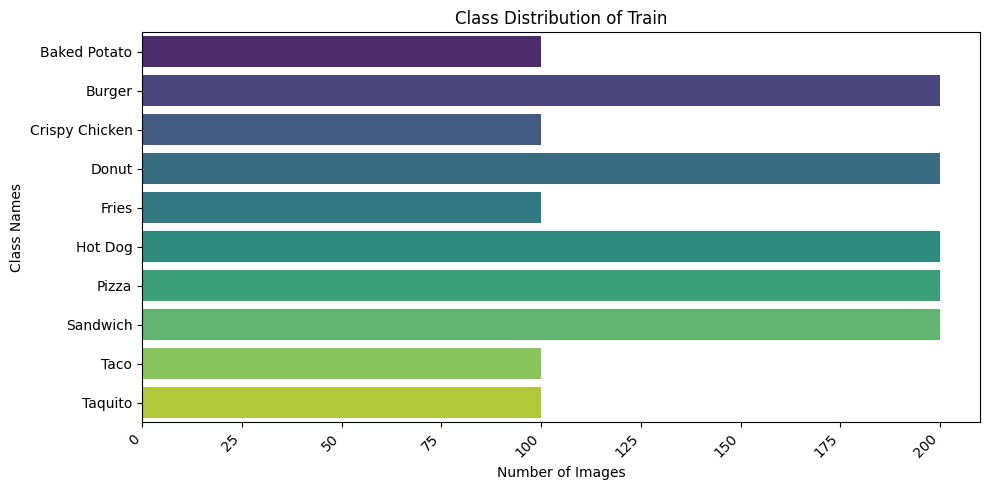

In [9]:
colors = sns.color_palette('viridis', n_classes)
plt.figure(figsize=(10, 5))
sns.barplot(y=class_names, x=class_dis, palette=colors, orient='h')

# Add labels and title
plt.xlabel('Number of Images')
plt.ylabel('Class Names')
plt.title('Class Distribution of Train')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Data Generator

In [10]:
path_train ="/kaggle/input/fast-food-classification-dataset/Fast Food Classification V2/Train/"
path_validation="/kaggle/input/fast-food-classification-dataset/Fast Food Classification V2/Valid/"

train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                   zoom_range=0.2,
                                   rotation_range=32,
                                   brightness_range=[0.2,1.0],
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(path_train,
                                                    target_size = (224, 224),
                                                    batch_size = 32,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(path_validation,
                                                              target_size = (224, 224),
                                                              batch_size = 32, 
                                                              class_mode='categorical',
                                                              shuffle=False)

Found 15000 images belonging to 10 classes.
Found 3500 images belonging to 10 classes.


### Function Utility

In [11]:
def show_image_per_class(directory, classes):
    num_classes = len(classes)
    num_rows = 7
    num_cols = 7

    plt.figure(figsize=(15, num_rows * 3))
    for i, class_name in enumerate(classes[:num_rows * num_cols]):
        class_dir = os.path.join(directory, class_name)
        img_file = random.choice(os.listdir(class_dir))
        img_path = os.path.join(class_dir, img_file)
        img = plt.imread(img_path)
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    
    plt.subplots_adjust(wspace=0.1, hspace=0.3)
    plt.show()


In [12]:
def Show_Images(target_gen):
    batch_images, batch_labels = next(target_gen)

    class_labels = list(target_gen.class_indices.keys())

    plt.figure(figsize=(20, 20))
    for n, i in enumerate(list(np.random.randint(0, len(batch_images), 16))):
        plt.subplot(4, 4, n + 1)
        plt.imshow(batch_images[i])
        plt.title(class_labels[np.argmax(batch_labels[i])])
        plt.axis('off')
    plt.show()


### Show Images

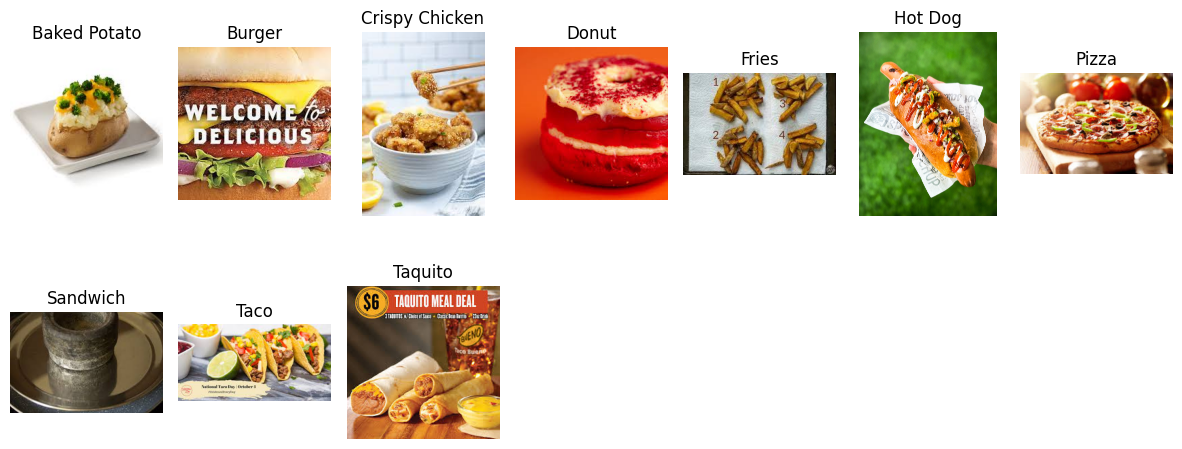

In [13]:
show_image_per_class(path_train, class_names)

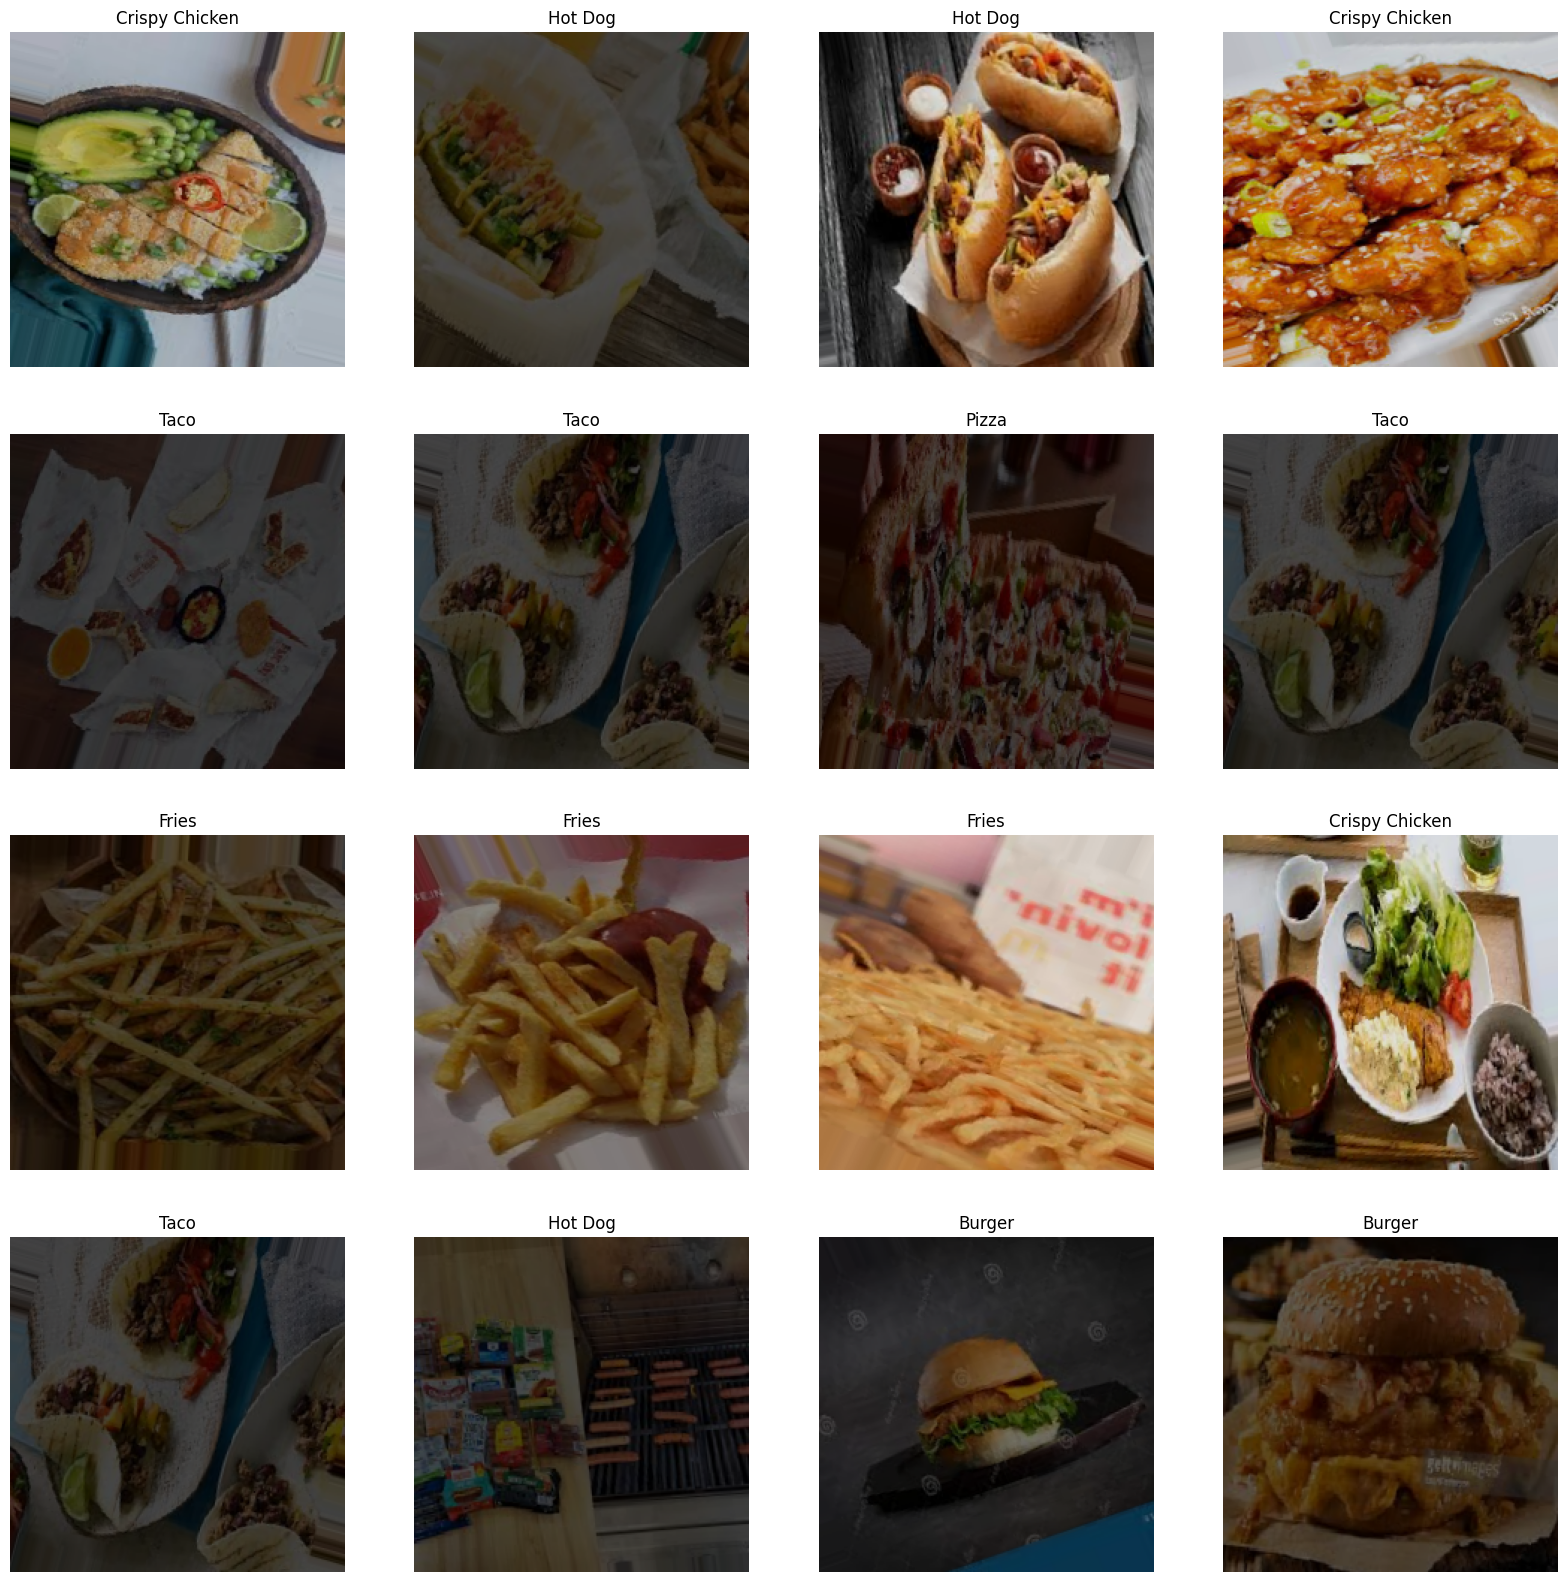

In [14]:
Show_Images(train_generator)

### Model Training

In [15]:
input_shape = (224, 224, 3)
pre_trained_model = tf.keras.applications.MobileNetV2(weights="imagenet",
                                include_top=False,
                                input_tensor=tf.keras.layers.Input(shape=input_shape))

for layer in pre_trained_model.layers:
    layer.trainable = True



9406464/9406464 [==============================] - 0s 0us/step


In [16]:
model = tf.keras.models.Sequential()

model.add(pre_trained_model)

model.add(tf.keras.layers.Flatten(name="flatten"))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [19]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              patience=3, 
                              factor=0.5,
                              min_lr=1e-6)

In [20]:
model_name = "model_checkpoint2.keras"

checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name,
                             monitor="val_accuracy",
                             mode="max",
                             save_best_only=True,
                             verbose=1)

In [21]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy') > 0.95 ):
      print("\nReached 95% both accuracy so cancelling training!")
      self.model.stop_training = True
        
callbacks = myCallback()

In [22]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5,        
                               restore_best_weights=True)

In [23]:
history = model.fit(
      train_generator,
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      callbacks=[checkpoint, reduce_lr, callbacks, early_stopping],
      )

Epoch 1/100


I0000 00:00:1717435442.739822      97 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 36/469 [=>............................] - ETA: 4:09 - loss: 2.8688 - accuracy: 0.2387

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


469/469 [==============================] - ETA: 0s - loss: 1.3796 - accuracy: 0.6137
Epoch 1: val_accuracy improved from -inf to 0.69943, saving model to model_checkpoint2.keras
469/469 [==============================] - 332s 638ms/step - loss: 1.3796 - accuracy: 0.6137 - val_loss: 1.2929 - val_accuracy: 0.6994 - lr: 1.0000e-04
Epoch 2/100
469/469 [==============================] - ETA: 0s - loss: 0.7731 - accuracy: 0.7774
Epoch 2: val_accuracy improved from 0.69943 to 0.77543, saving model to model_checkpoint2.keras
469/469 [==============================] - 209s 445ms/step - loss: 0.7731 - accuracy: 0.7774 - val_loss: 0.9239 - val_accuracy: 0.7754 - lr: 1.0000e-04
Epoch 3/100
469/469 [==============================] - ETA: 0s - loss: 0.6171 - accuracy: 0.8191
Epoch 3: val_accuracy improved from 0.77543 to 0.78029, saving model to model_checkpoint2.keras
469/469 [==============================] - 209s 444ms/step - loss: 0.6171 - accuracy: 0.8191 - val_loss: 0.8417 - val_accuracy: 0.78

### Training and Validation History

In [24]:
training_history = history.history
training_df = pd.DataFrame(training_history)
print(training_df.tail())

        loss  accuracy  val_loss  val_accuracy        lr
32  0.083963  0.985733  0.559340      0.871429  0.000002
33  0.081556  0.986800  0.558971      0.872571  0.000002
34  0.082343  0.986067  0.557592      0.871714  0.000002
35  0.079117  0.986333  0.555906      0.870571  0.000001
36  0.079678  0.987200  0.554005      0.871714  0.000001


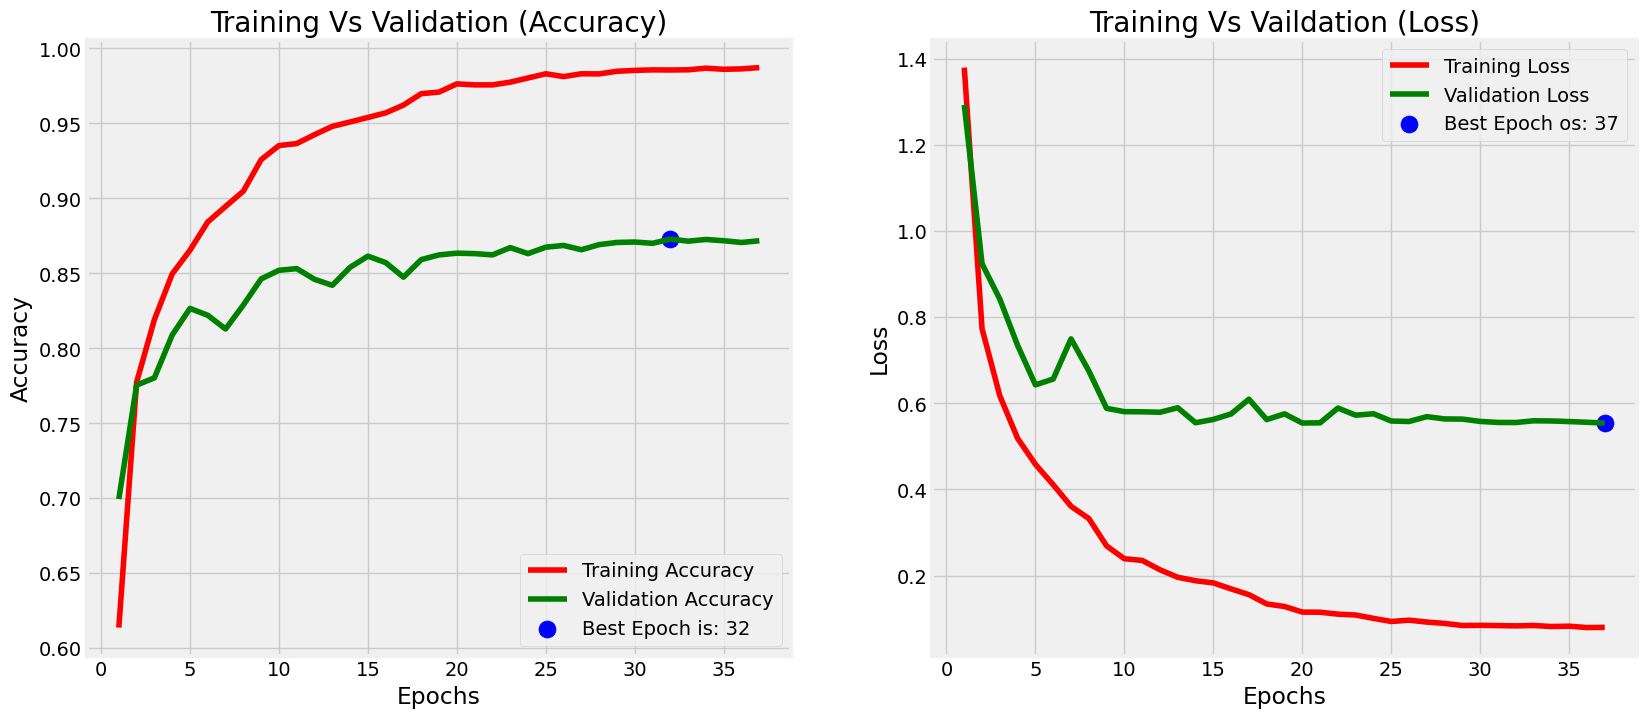

In [25]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc= np.argmax(val_acc)

val_lowest= val_loss[index_loss]
val_highest = val_acc[index_acc]

epochs= [i+1 for i in range(len(train_acc))]
acc_label = f"Best Epoch is: {str(index_acc +1)}"
loss_label = f"Best Epoch os: {str(index_loss +1)}"

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(epochs , train_acc , 'r' , label= "Training Accuracy")
plt.plot(epochs , val_acc , 'g' , label= "Validation Accuracy")
plt.scatter(index_acc +1 ,val_highest , s = 150 , c= 'blue', label= acc_label)
plt.title('Training Vs Validation (Accuracy)')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs , train_loss , 'r' , label= "Training Loss")
plt.plot(epochs , val_loss , 'g' , label= "Validation Loss")
plt.scatter(index_loss +1 , val_lowest , s= 150 , c = 'blue' , label= loss_label)
plt.title("Training Vs Vaildation (Loss)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout
plt.show();